In [1]:
!pip install datasets tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.7 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
from datasets import load_dataset
import numpy as np
from PIL import Image
import os

In [3]:
num_epochs = 10
batch_size = 64
learning_rate = 0.001
input_shape = (224, 224, 3)
num_classes = 1000

In [4]:

hf_dataset = load_dataset("evanarlian/imagenet_1k_resized_256")
train_ds = hf_dataset["train"].shuffle(seed=42).select(range(int(0.2 * len(hf_dataset["train"]))))
val_ds = hf_dataset["val"].shuffle(seed=42).select(range(int(0.2 * len(hf_dataset["val"]))))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/42.8k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/52 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/52 [00:00<?, ?it/s]

(…)-00000-of-00052-ab3669701d34fafd.parquet:   0%|          | 0.00/407M [00:00<?, ?B/s]

(…)-00001-of-00052-886eb11e764e42fe.parquet:   0%|          | 0.00/459M [00:00<?, ?B/s]

(…)-00002-of-00052-571cd07ccaf0aba0.parquet:   0%|          | 0.00/526M [00:00<?, ?B/s]

(…)-00003-of-00052-49870f486abf934b.parquet:   0%|          | 0.00/468M [00:00<?, ?B/s]

(…)-00004-of-00052-bc97b5e788035bad.parquet:   0%|          | 0.00/452M [00:00<?, ?B/s]

(…)-00005-of-00052-9d0b127c7e0e09bb.parquet:   0%|          | 0.00/469M [00:00<?, ?B/s]

(…)-00006-of-00052-443d777da4499fe1.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

(…)-00007-of-00052-7ebbc227884edb2e.parquet:   0%|          | 0.00/441M [00:00<?, ?B/s]

(…)-00008-of-00052-7224e59e6fb2283d.parquet:   0%|          | 0.00/420M [00:00<?, ?B/s]

(…)-00009-of-00052-5d9ec470527af545.parquet:   0%|          | 0.00/437M [00:00<?, ?B/s]

(…)-00010-of-00052-90357a90cf01564f.parquet:   0%|          | 0.00/438M [00:00<?, ?B/s]

(…)-00011-of-00052-84441e954d2c2329.parquet:   0%|          | 0.00/440M [00:00<?, ?B/s]

(…)-00012-of-00052-c9dcf6cc363154af.parquet:   0%|          | 0.00/439M [00:00<?, ?B/s]

(…)-00013-of-00052-a27e982c9824b2fc.parquet:   0%|          | 0.00/429M [00:00<?, ?B/s]

(…)-00014-of-00052-caf2b2509ba5bca4.parquet:   0%|          | 0.00/480M [00:00<?, ?B/s]

(…)-00015-of-00052-bdba5c26345dc257.parquet:   0%|          | 0.00/479M [00:00<?, ?B/s]

(…)-00016-of-00052-f0e7e2a77c85dddb.parquet:   0%|          | 0.00/376M [00:00<?, ?B/s]

(…)-00017-of-00052-35dee92924c77695.parquet:   0%|          | 0.00/512M [00:00<?, ?B/s]

(…)-00018-of-00052-2fa17f14cc8113e0.parquet:   0%|          | 0.00/505M [00:00<?, ?B/s]

(…)-00019-of-00052-213a7684b48d6a12.parquet:   0%|          | 0.00/497M [00:00<?, ?B/s]

(…)-00020-of-00052-3d2f3be76c1ba810.parquet:   0%|          | 0.00/465M [00:00<?, ?B/s]

(…)-00021-of-00052-3660c4ef5916a594.parquet:   0%|          | 0.00/416M [00:00<?, ?B/s]

(…)-00022-of-00052-5009c46203164a5b.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

(…)-00023-of-00052-8112dbb3c625d13a.parquet:   0%|          | 0.00/428M [00:00<?, ?B/s]

(…)-00024-of-00052-c4d3713f0afbe4aa.parquet:   0%|          | 0.00/418M [00:00<?, ?B/s]

(…)-00025-of-00052-6f44606ad3c37c83.parquet:   0%|          | 0.00/422M [00:00<?, ?B/s]

(…)-00026-of-00052-f14be58421a67130.parquet:   0%|          | 0.00/404M [00:00<?, ?B/s]

(…)-00027-of-00052-9fc8a75241a3bff4.parquet:   0%|          | 0.00/409M [00:00<?, ?B/s]

(…)-00028-of-00052-177f34038e9c9a41.parquet:   0%|          | 0.00/409M [00:00<?, ?B/s]

(…)-00029-of-00052-30a255a07ff7f0a1.parquet:   0%|          | 0.00/425M [00:00<?, ?B/s]

(…)-00030-of-00052-e03c81bb91998efe.parquet:   0%|          | 0.00/430M [00:00<?, ?B/s]

(…)-00031-of-00052-d6b3ddecb505510d.parquet:   0%|          | 0.00/412M [00:00<?, ?B/s]

(…)-00032-of-00052-c900ccd02789e979.parquet:   0%|          | 0.00/379M [00:00<?, ?B/s]

(…)-00033-of-00052-4c190857e211d139.parquet:   0%|          | 0.00/423M [00:00<?, ?B/s]

(…)-00034-of-00052-c5493adb43fc85e9.parquet:   0%|          | 0.00/433M [00:00<?, ?B/s]

(…)-00035-of-00052-d798ec91d9a0ff6d.parquet:   0%|          | 0.00/379M [00:00<?, ?B/s]

(…)-00036-of-00052-7fe4632282d81221.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

(…)-00037-of-00052-4ee8734426e31605.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

(…)-00038-of-00052-7bd96ec24cd33d9b.parquet:   0%|          | 0.00/408M [00:00<?, ?B/s]

(…)-00039-of-00052-b109e5add285a95f.parquet:   0%|          | 0.00/419M [00:00<?, ?B/s]

(…)-00040-of-00052-990121a5969b5d25.parquet:   0%|          | 0.00/396M [00:00<?, ?B/s]

(…)-00041-of-00052-62cf7e9821e34e46.parquet:   0%|          | 0.00/431M [00:00<?, ?B/s]

(…)-00042-of-00052-ecaecb37069945be.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

(…)-00043-of-00052-bc1d99c96f17f3a3.parquet:   0%|          | 0.00/404M [00:00<?, ?B/s]

(…)-00044-of-00052-4644f2eae294bf72.parquet:   0%|          | 0.00/439M [00:00<?, ?B/s]

(…)-00045-of-00052-595d2e515a3ee7d9.parquet:   0%|          | 0.00/434M [00:00<?, ?B/s]

(…)-00046-of-00052-c0255165d012e10b.parquet:   0%|          | 0.00/380M [00:00<?, ?B/s]

(…)-00047-of-00052-a3f3ab1e9cb8f878.parquet:   0%|          | 0.00/434M [00:00<?, ?B/s]

(…)-00048-of-00052-b19b8bd9a8957bd9.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

(…)-00049-of-00052-2a355f06f10edd93.parquet:   0%|          | 0.00/435M [00:00<?, ?B/s]

(…)-00050-of-00052-8633d68c8a494520.parquet:   0%|          | 0.00/408M [00:00<?, ?B/s]

(…)-00051-of-00052-e00f2fc9aebbf12b.parquet:   0%|          | 0.00/477M [00:00<?, ?B/s]

(…)-00000-of-00002-b5248be478d25e41.parquet:   0%|          | 0.00/449M [00:00<?, ?B/s]

(…)-00001-of-00002-85f3d9c8fa1edb63.parquet:   0%|          | 0.00/420M [00:00<?, ?B/s]

(…)-00000-of-00004-1abbff57b76eb035.parquet:   0%|          | 0.00/434M [00:00<?, ?B/s]

(…)-00001-of-00004-2f9e9209a1ce00dc.parquet:   0%|          | 0.00/435M [00:00<?, ?B/s]

(…)-00002-of-00004-225b74454a908b80.parquet:   0%|          | 0.00/436M [00:00<?, ?B/s]

(…)-00003-of-00004-b95f7accd8ef60e1.parquet:   0%|          | 0.00/433M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1281167 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/46 [00:00<?, ?it/s]

In [5]:
def tf_generator(dataset):
    def generator():
        for example in dataset:
            image = example["image"]
            if isinstance(image, list):
                image = np.array(image)
            if not isinstance(image, Image.Image):
                image = Image.fromarray(image)

            image = image.resize((224, 224))
            image = np.array(image) / 255.0

            yield image.astype(np.float32), example["label"]
    return generator

In [6]:
train_tf_dataset = tf.data.Dataset.from_generator(
    tf_generator(train_ds),
    output_signature=(
        tf.TensorSpec(shape=input_shape, dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int64),
    )
).batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_tf_dataset = tf.data.Dataset.from_generator(
    tf_generator(val_ds),
    output_signature=(
        tf.TensorSpec(shape=input_shape, dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int64),
    )
).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [7]:
# 5. Bygg ResNet50-modell med ny topp
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
base_model.trainable = True  # Freezer feature extractor

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=outputs)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [8]:
from tensorflow.keras.callbacks import EarlyStopping


In [9]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_tf_dataset.repeat(),
    validation_data=val_tf_dataset.repeat(),
    steps_per_epoch=len(train_ds) // batch_size,
    validation_steps=len(val_ds) // batch_size,
    epochs=30,
    callbacks=[early_stop]
)


Epoch 1/30
4003/4003 ━━━━━━━━━━━━━━━━━━━━ 2245s 545ms/step - accuracy: 0.0557 - loss: 6.2214 - val_accuracy: 0.4306 - val_loss: 2.9364
Epoch 2/30
 569/4003 ━━━━━━━━━━━━━━━━━━━━ 30:37 535ms/step - accuracy: 0.3315 - loss: 3.3257

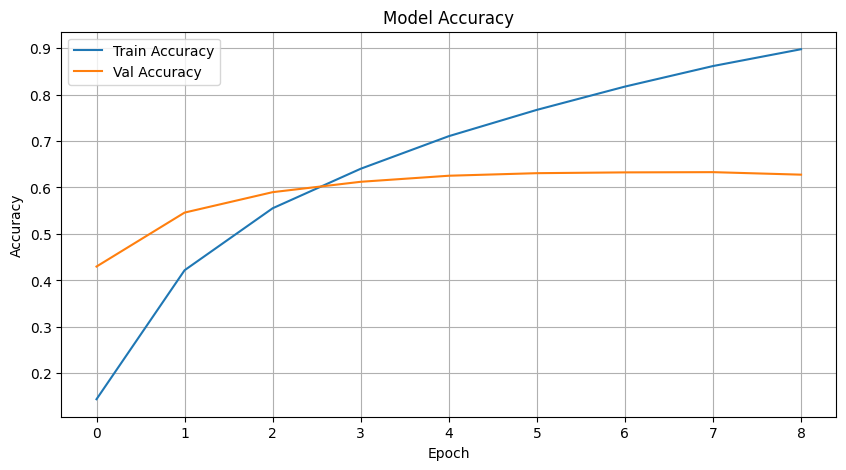

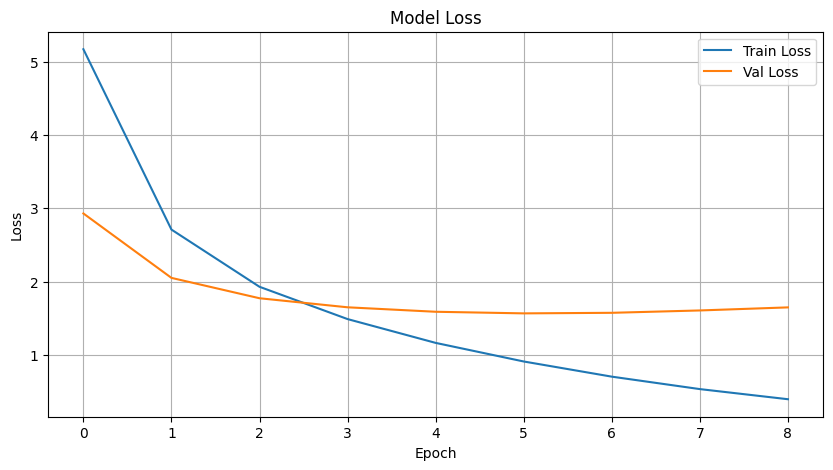

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
  model.save('/content/drive/MyDrive/min_resnet50_model.h5')
